## **Part 3: Python (EDA + Forecasting & Trend Analysis)**
#### Imported required libraries for analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import os

from statsmodels.tsa.seasonal import seasonal_decompose

#### Load the CSVs and Cleaning the Data

In [5]:
folder_path = "C:/Users/Satendra Singh/Downloads/project 1"

csv_files = {
    "prices.csv": "prices",
    "securities.csv": "securities",
    "prices-split-adjusted.csv": "prices_adj",
    "fundamentals.csv": "fundamentals"
}

dataframes = {}

for file, var_name in csv_files.items():
    df = pd.read_csv(os.path.join(folder_path, file))
    
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
    
    dataframes[var_name] = df
    globals()[var_name] = df 

    print(f"✅ Loaded and cleaned: {var_name} ({len(df)} rows)")


✅ Loaded and cleaned: prices (851264 rows)
✅ Loaded and cleaned: securities (505 rows)
✅ Loaded and cleaned: prices_adj (851264 rows)
✅ Loaded and cleaned: fundamentals (1781 rows)


In [6]:
print(prices_adj.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [8]:
print(prices.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [12]:
print(fundamentals.columns)

Index(['unnamed:_0', 'ticker_symbol', 'period_ending', 'accounts_payable',
       'accounts_receivable', 'add'l_income/expense_items', 'after_tax_roe',
       'capital_expenditures', 'capital_surplus', 'cash_ratio',
       'cash_and_cash_equivalents', 'changes_in_inventories', 'common_stocks',
       'cost_of_revenue', 'current_ratio', 'deferred_asset_charges',
       'deferred_liability_charges', 'depreciation',
       'earnings_before_interest_and_tax', 'earnings_before_tax',
       'effect_of_exchange_rate',
       'equity_earnings/loss_unconsolidated_subsidiary', 'fixed_assets',
       'goodwill', 'gross_margin', 'gross_profit', 'income_tax',
       'intangible_assets', 'interest_expense', 'inventory', 'investments',
       'liabilities', 'long-term_debt', 'long-term_investments',
       'minority_interest', 'misc._stocks', 'net_borrowings', 'net_cash_flow',
       'net_cash_flow-operating', 'net_cash_flows-financing',
       'net_cash_flows-investing', 'net_income', 'net_income_ad

In [14]:
print(securities.columns)

Index(['ticker_symbol', 'security', 'sec_filings', 'gics_sector',
       'gics_sub_industry', 'address_of_headquarters', 'date_first_added',
       'cik'],
      dtype='object')


### **1. EDA**
### 1.1 Analyze Adjusted Stock Prices Over Time
#### Step 1.1.1 : Basic Info & Structure
##### *This provides data types, missing values, and numeric summary.*

In [17]:
print("Summary of Adjusted Prices Data")
print(prices_adj.info())
print(prices_adj.describe())

Summary of Adjusted Prices Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB
None
                open          close            low           high  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.

#### Step 1.1.2: Rename 'ticker' to 'ticker_symbol'

In [20]:
prices_adj.rename(columns={'symbol': 'ticker_symbol'}, inplace=True)

#### Step 1.1.3: Plot Adjusted Close Price Over Time for a Sample Ticker
##### *Visualizes stock trend over time for a company.*

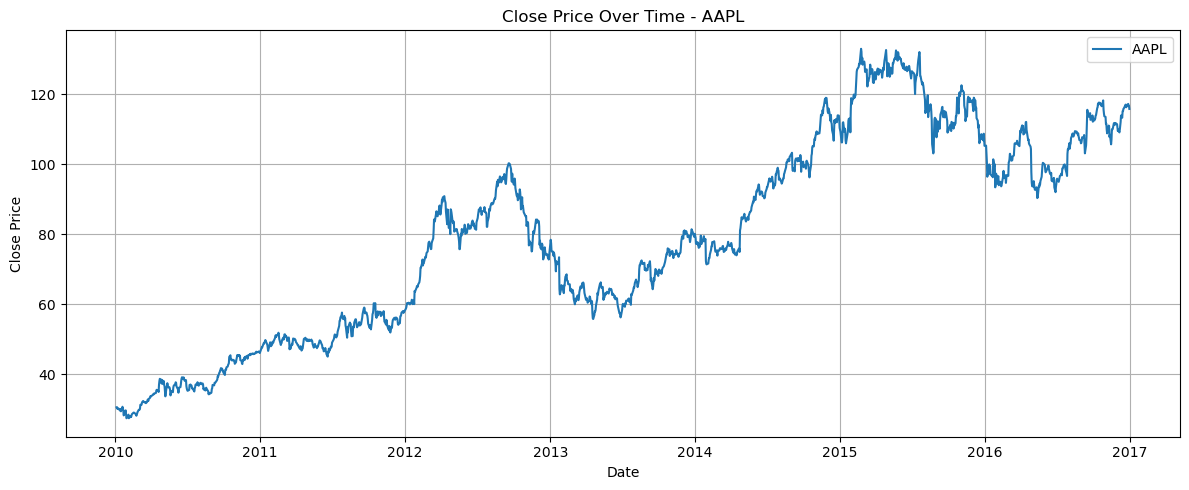

In [23]:
sample_ticker = 'AAPL'
df_ticker = prices_adj[prices_adj['ticker_symbol'] == 'AAPL'].copy()
df_ticker['date'] = pd.to_datetime(df_ticker['date'])

plt.figure(figsize=(12, 5))
plt.plot(df_ticker['date'], df_ticker['close'], label=sample_ticker)
plt.title(f"Close Price Over Time - {sample_ticker}")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


 #### Step 1.1.4: Missing Values Heatmap
 ##### *Helps identify missing data issues.*

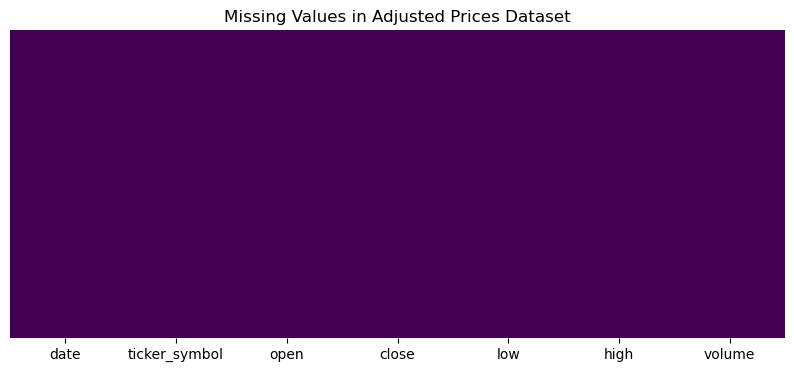

date             0
ticker_symbol    0
open             0
close            0
low              0
high             0
volume           0
dtype: int64


In [26]:
plt.figure(figsize=(10, 4))
sns.heatmap(prices_adj.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values in Adjusted Prices Dataset")
plt.show()

# To check there is no  null value or not
print(prices_adj.isnull().sum())

 ### 1.2: Financial Metrics Over Years 
 #### Step 1.2.1: Convert Date & Plot Net Income for AAL
 ##### *Shows how net income changes year to year.*

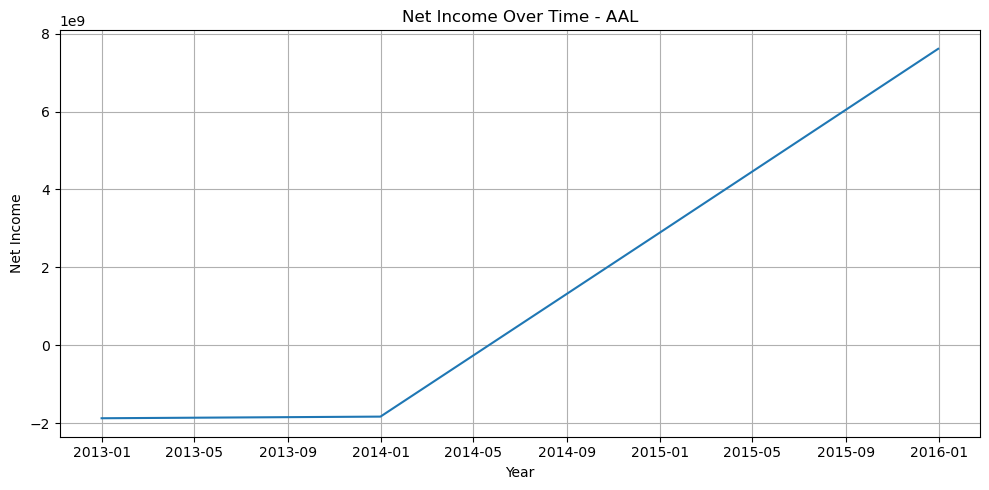

In [28]:
fundamentals['period_ending'] = pd.to_datetime(fundamentals['period_ending'])

aal_df = fundamentals[fundamentals['ticker_symbol'] == 'AAL'].sort_values('period_ending')

plt.figure(figsize=(10, 5))
plt.plot(aal_df['period_ending'], aal_df['net_income'])
plt.title("Net Income Over Time - AAL")
plt.xlabel("Year")
plt.ylabel("Net Income")
plt.grid(True)
plt.tight_layout()
plt.show()

 #### Step 1.2.2: Correlation Heatmap of Financial Metrics
 ##### *Explores relationships among numeric financial metrics.*



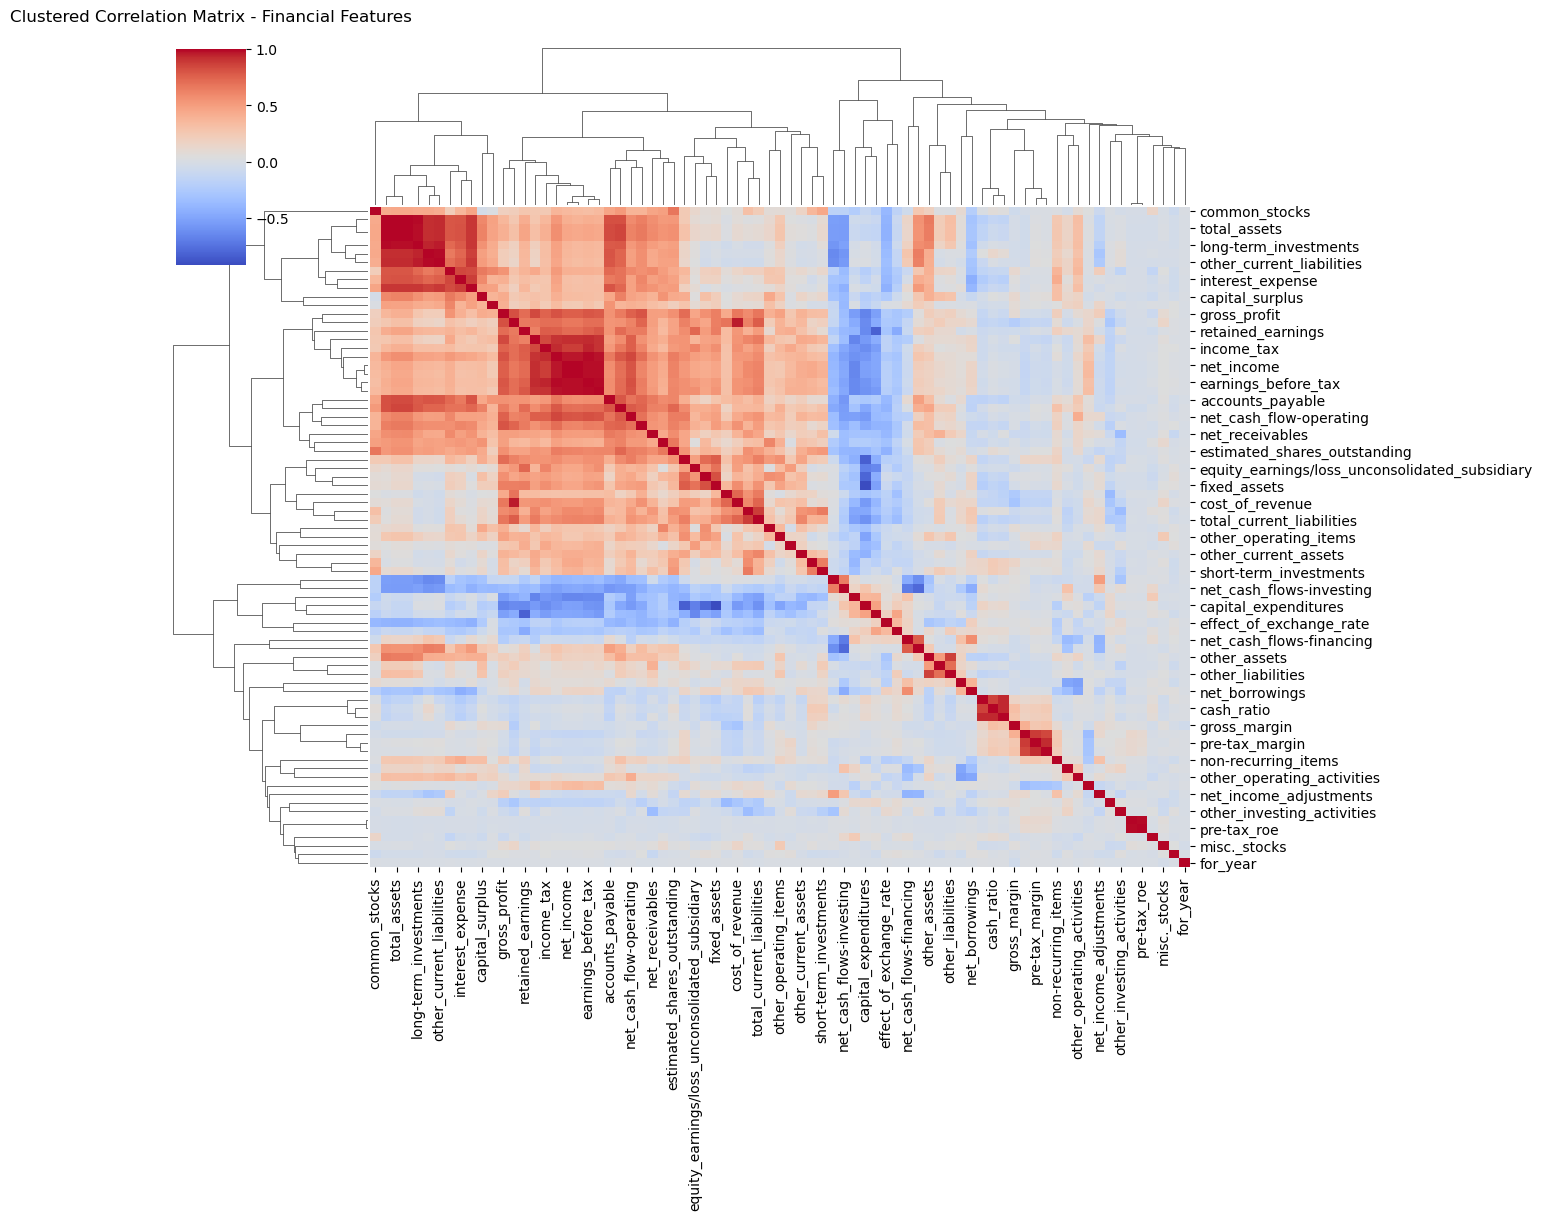

In [30]:
sns.clustermap(fundamentals.select_dtypes(include='number').corr(), cmap='coolwarm', figsize=(14, 12))
plt.title("Clustered Correlation Matrix - Financial Features", pad=20)
plt.show()

### 1.3: Sector-wise Patterns 
#### Step 1.3.1: Merge fundamentals and securities on ticker_symbol
##### *Adds sector info to financials.*

In [32]:
merged = fundamentals.merge(
    securities[['ticker_symbol', 'gics_sector']],
    on='ticker_symbol',
    how='left'
)

#### Step 1.3.2: Boxplot of Net Income by Sector


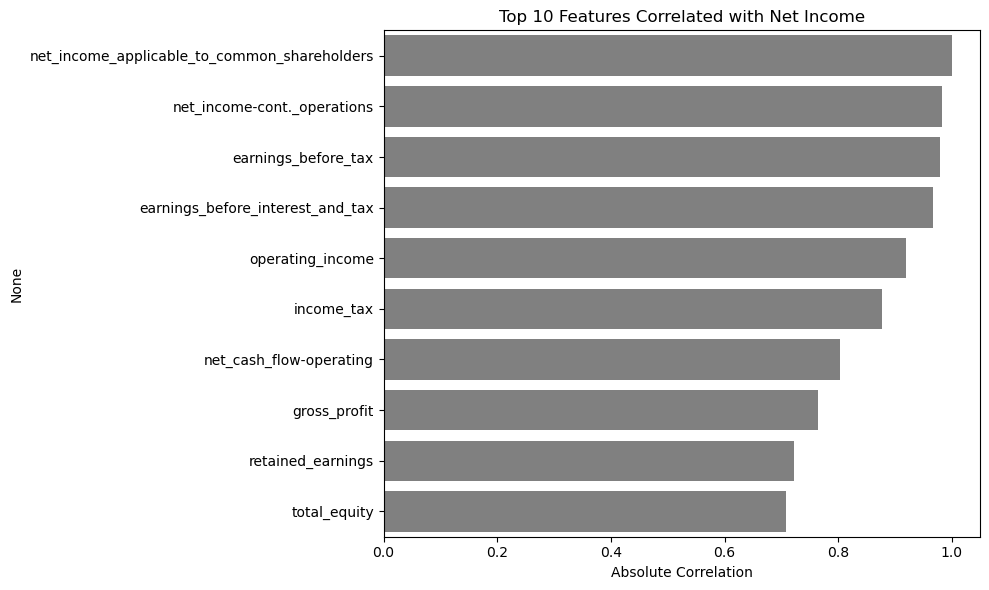

In [36]:
# Get top absolute correlations with net_income
correlation_series = fundamentals.select_dtypes(include='number').corr()['net_income'].drop('net_income')
top_corr = correlation_series.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values, y=top_corr.index, color='grey')
plt.title("Top 10 Features Correlated with Net Income")
plt.xlabel("Absolute Correlation")
plt.tight_layout()
plt.show()

#### Step 1.3.3: Average R&D Expense by Sector
##### *Finds which sectors invest more in R&D.*

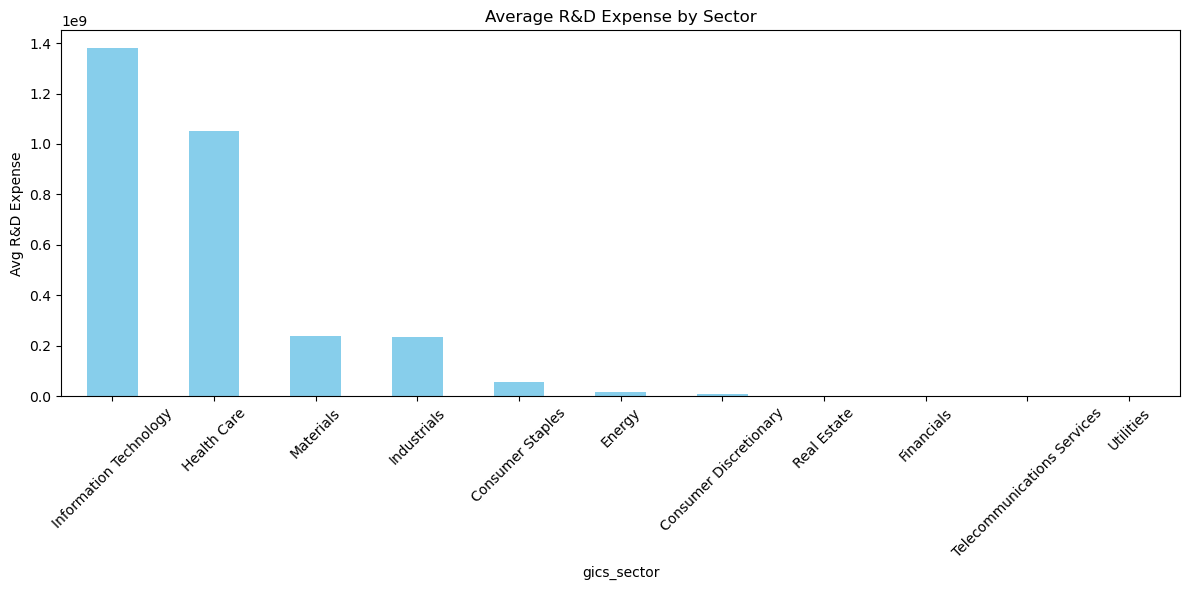

In [41]:
avg_rd = merged.groupby('gics_sector')['research_and_development'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_rd.plot(kind='bar', color='skyblue')
plt.title("Average R&D Expense by Sector")
plt.ylabel("Avg R&D Expense")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **2. Time-Series Dataset Creation**
#### 2.1. Monthly Average Adjusted Closing Prices

In [44]:
# Convert 'date' to datetime
prices_adj['date'] = pd.to_datetime(prices_adj['date'])

# Create 'year_month' period
prices_adj['year_month'] = prices_adj['date'].dt.to_period('M')

monthly_avg_prices = (
    prices_adj.groupby(['ticker_symbol', 'year_month'])['close']
    .mean()
    .reset_index()
    .rename(columns={'close': 'avg_close_price'})
)

monthly_avg_prices['year_month'] = monthly_avg_prices['year_month'].astype(str)

monthly_avg_prices.head(5)


,ticker_symbol,year_month,avg_close_price
0,A,2010-01,21.610195
1,A,2010-02,21.551465
2,A,2010-03,23.954407
3,A,2010-04,25.331766
4,A,2010-05,23.756080


#### 2.2 Monthly Revenue from Fundamentals

In [47]:
# Convert 'period_ending' to datetime
fundamentals['period_ending'] = pd.to_datetime(fundamentals['period_ending'])

# Create 'year_month' column
fundamentals['year_month'] = fundamentals['period_ending'].dt.to_period('M').astype(str)

# Group by symbol and period, compute total revenue
monthly_revenue = (
    fundamentals.assign(year_month=pd.to_datetime(fundamentals['period_ending']).dt.to_period('M').astype(str))
    .groupby(['ticker_symbol', 'year_month'])['total_revenue']
    .sum()
    .reset_index()
)

# Display the result
print("Monthly Total Revenue per Ticker:\n", monthly_revenue)


Monthly Total Revenue per Ticker:
      ticker_symbol year_month  total_revenue
0              AAL    2012-12   2.485500e+10
1              AAL    2013-12   2.674300e+10
2              AAL    2014-12   4.265000e+10
3              AAL    2015-12   4.099000e+10
4              AAP    2012-12   6.205003e+09
...            ...        ...            ...
1776          ZION    2015-12   2.210591e+09
1777           ZTS    2013-12   4.561000e+09
1778           ZTS    2014-12   4.785000e+09
1779           ZTS    2015-12   4.765000e+09
1780           ZTS    2016-12   4.888000e+09

[1781 rows x 3 columns]


## **3. Trend & Seasonality**

#### Library Required
pip install prophet


#### 3.1 Detect Seasonality in Adjusted Close Prices


🔍 Seasonality Analysis for: KSU


12:08:49 - cmdstanpy - INFO - Chain [1] start processing
12:08:50 - cmdstanpy - INFO - Chain [1] done processing


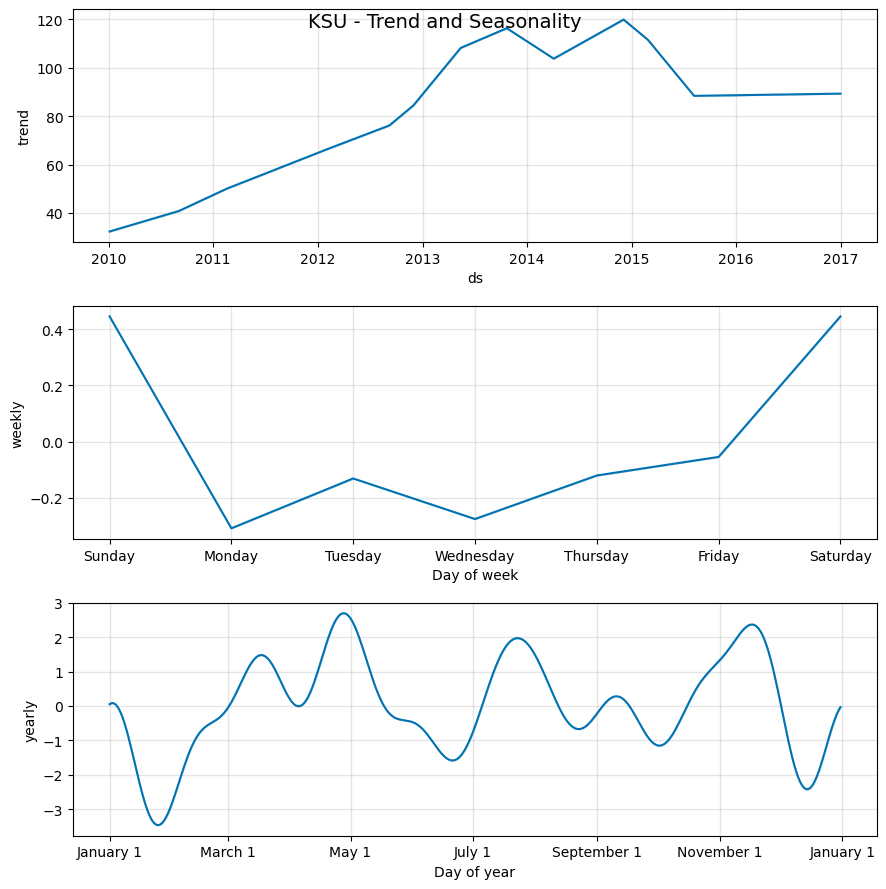

12:08:51 - cmdstanpy - INFO - Chain [1] start processing



🔍 Seasonality Analysis for: NOC


12:08:51 - cmdstanpy - INFO - Chain [1] done processing


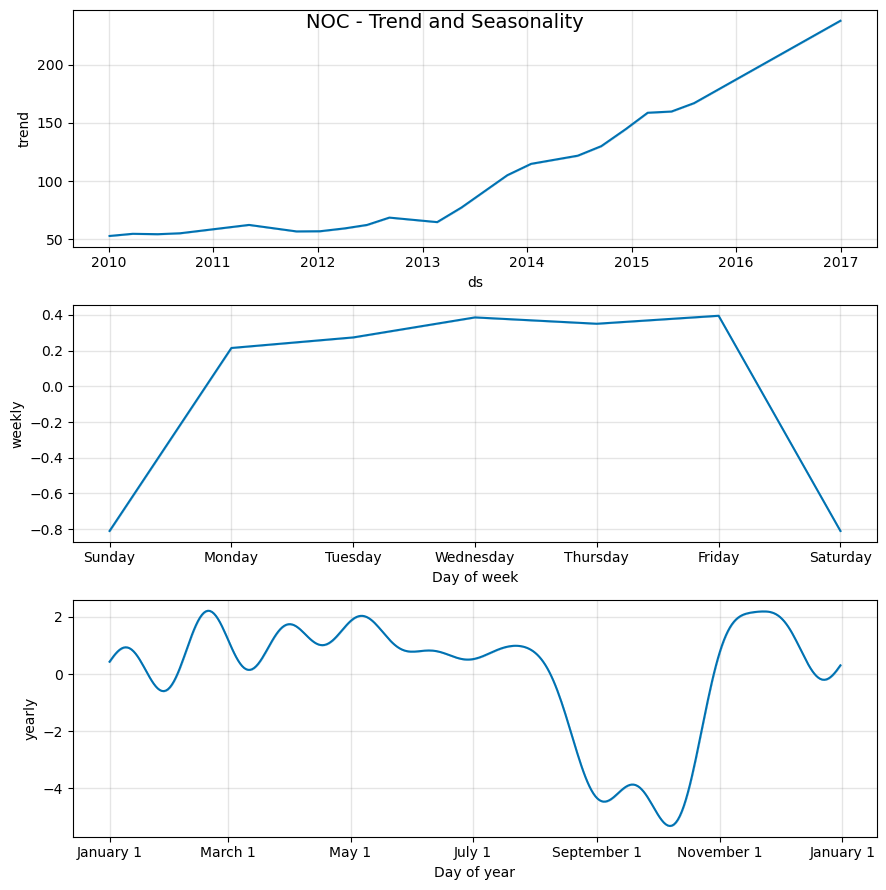

12:08:52 - cmdstanpy - INFO - Chain [1] start processing



🔍 Seasonality Analysis for: ORCL


12:08:53 - cmdstanpy - INFO - Chain [1] done processing


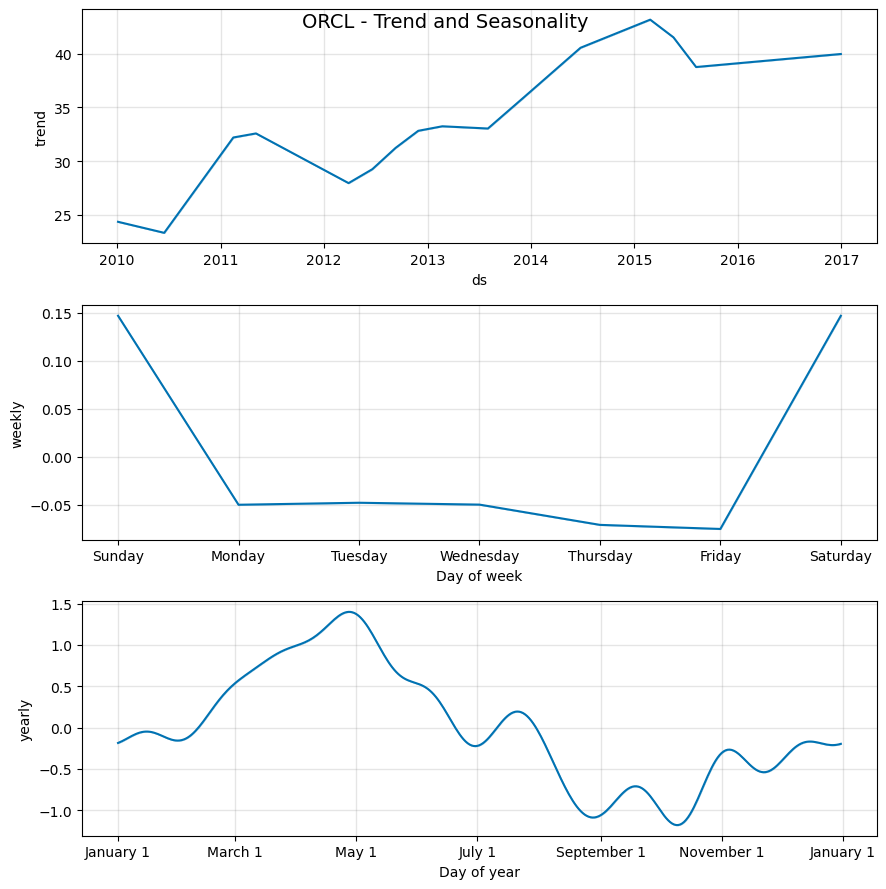

12:08:54 - cmdstanpy - INFO - Chain [1] start processing



🔍 Seasonality Analysis for: OMC


12:08:54 - cmdstanpy - INFO - Chain [1] done processing


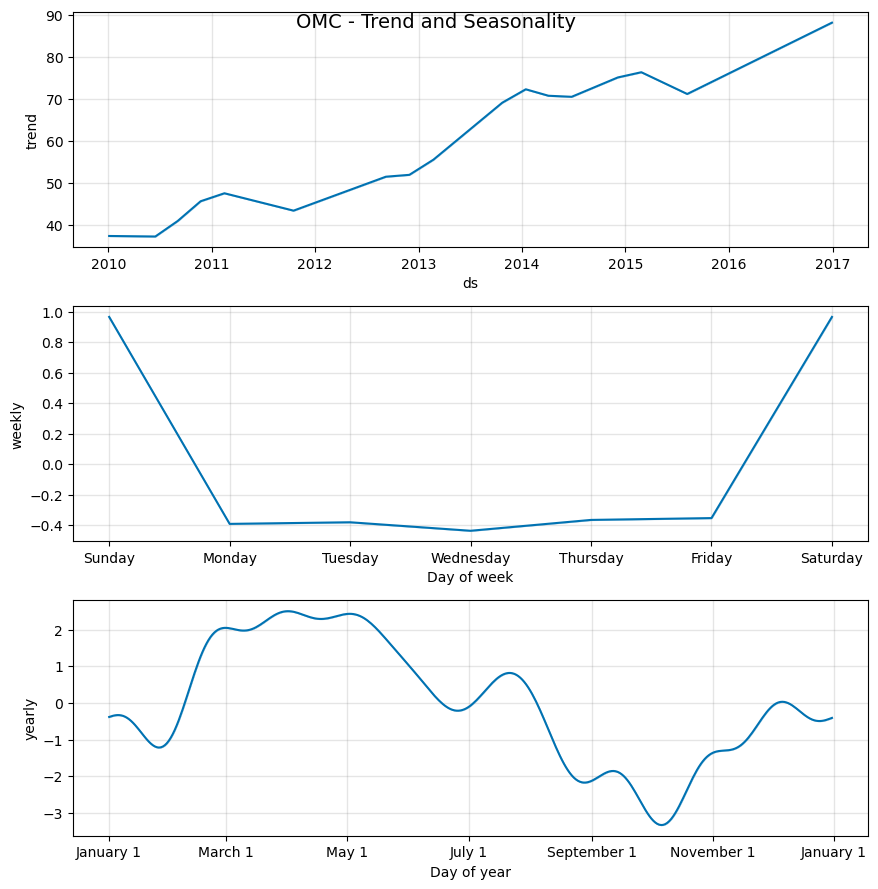

12:08:55 - cmdstanpy - INFO - Chain [1] start processing



🔍 Seasonality Analysis for: OKE


12:08:56 - cmdstanpy - INFO - Chain [1] done processing


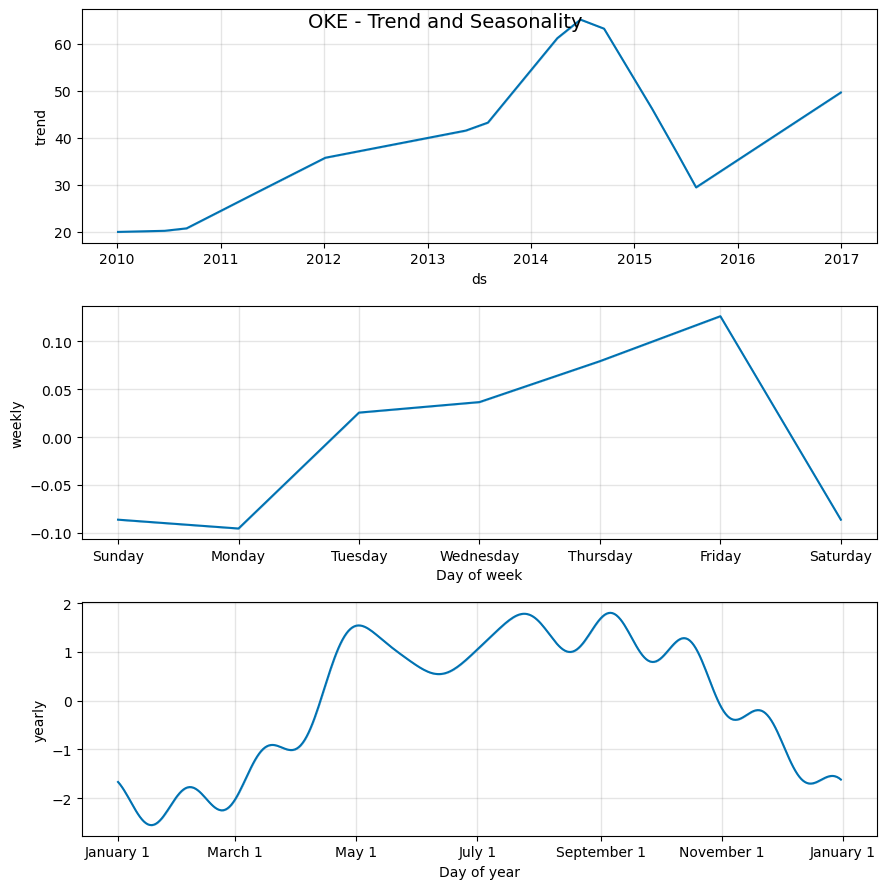

In [52]:
from prophet import Prophet

prices = pd.read_csv("prices-split-adjusted.csv")

prices['date'] = pd.to_datetime(prices['date'])

# Check top companies by data volume
top_symbols = prices['symbol'].value_counts().head(5).index.tolist()

# Loop through each top company to fit Prophet model and detect seasonality
for symbol in top_symbols:
    print(f"\n🔍 Seasonality Analysis for: {symbol}")

    df = prices[prices['symbol'] == symbol][['date', 'close']].rename(
        columns={'date': 'ds', 'close': 'y'}
    )
    df = df.dropna()

    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df)

    future = model.make_future_dataframe(periods=0)
    forecast = model.predict(future)

    # Plot components (trend, yearly seasonality)
    fig2 = model.plot_components(forecast)
    fig2.suptitle(f"{symbol} - Trend and Seasonality", fontsize=14)
    plt.show()


#### 3.2 Forecast the Next 12 Months of Adjusted Price for Top 5 Companies
##### Use Prophet to forecast adjusted close prices for the next 12 months for the top 5 companies by data count.

12:08:57 - cmdstanpy - INFO - Chain [1] start processing



📈 Forecasting Next 12 Months for: KSU


12:08:57 - cmdstanpy - INFO - Chain [1] done processing


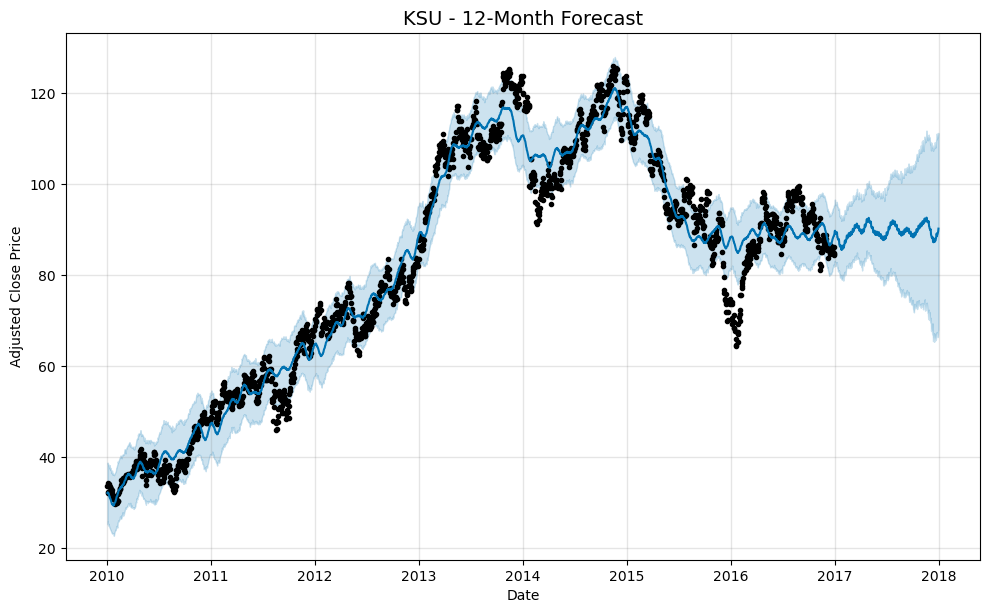

12:08:58 - cmdstanpy - INFO - Chain [1] start processing



📈 Forecasting Next 12 Months for: NOC


12:08:58 - cmdstanpy - INFO - Chain [1] done processing


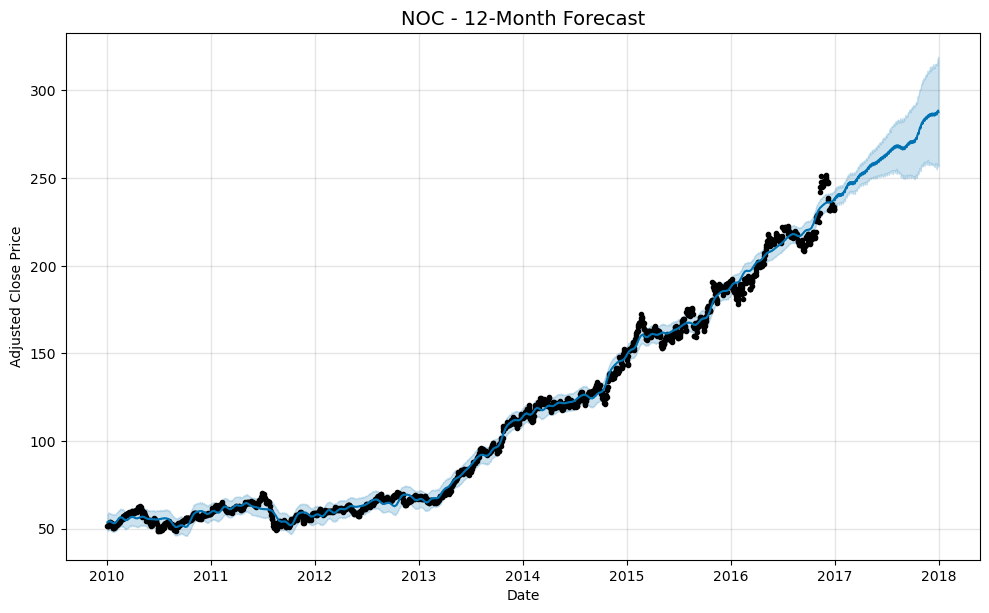

12:08:59 - cmdstanpy - INFO - Chain [1] start processing



📈 Forecasting Next 12 Months for: ORCL


12:08:59 - cmdstanpy - INFO - Chain [1] done processing


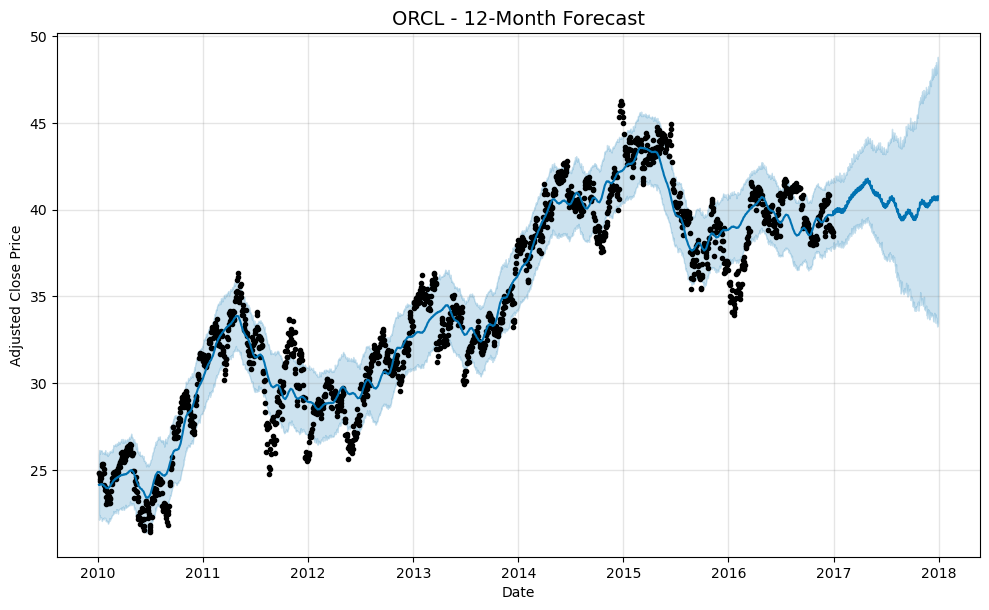

12:09:00 - cmdstanpy - INFO - Chain [1] start processing



📈 Forecasting Next 12 Months for: OMC


12:09:01 - cmdstanpy - INFO - Chain [1] done processing


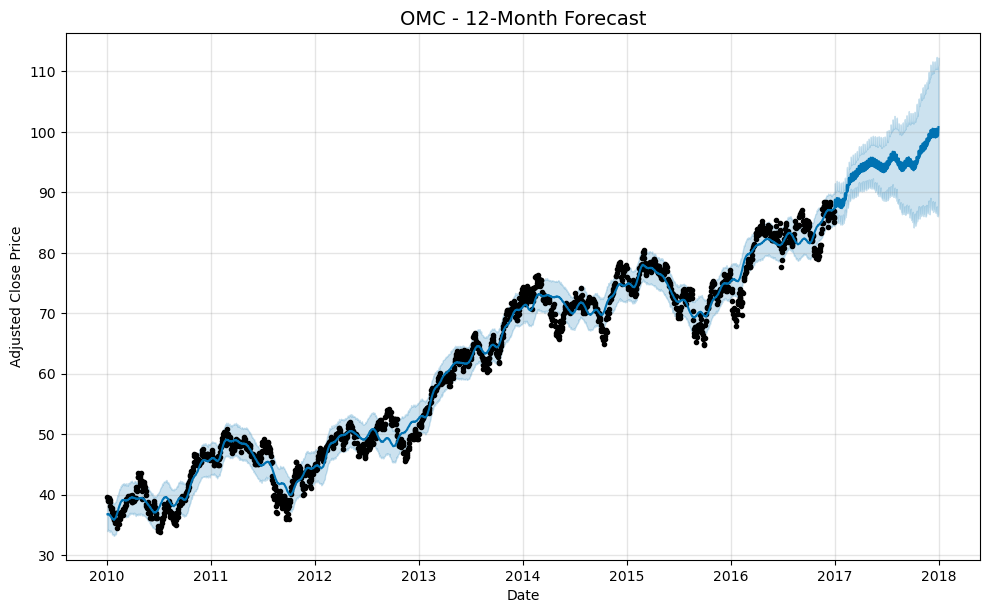

12:09:01 - cmdstanpy - INFO - Chain [1] start processing



📈 Forecasting Next 12 Months for: OKE


12:09:02 - cmdstanpy - INFO - Chain [1] done processing


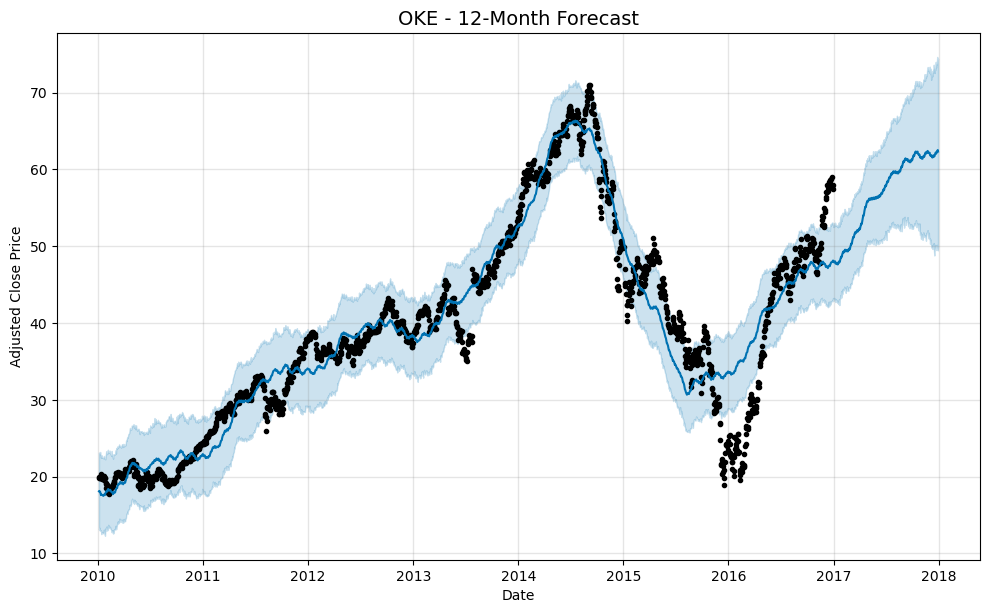

In [54]:
# Forecast the next 365 days of adjusted prices for top 5 companies
for symbol in top_symbols:
    print(f"\n📈 Forecasting Next 12 Months for: {symbol}")

    df = prices[prices['symbol'] == symbol][['date', 'close']].rename(
        columns={'date': 'ds', 'close': 'y'}
    )
    df = df.dropna()

    model = Prophet(yearly_seasonality=True, daily_seasonality=False)
    model.fit(df)

    future = model.make_future_dataframe(periods=365)
    forecast = model.predict(future)

    # Plot forecast
    fig = model.plot(forecast)
    plt.title(f"{symbol} - 12-Month Forecast", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Adjusted Close Price")
    plt.grid(True)
    plt.show()

## **4. Category-Level Forecasting**
#### 4.1 Revenue Forecast by GICS Sector
##### To forecast monthly total revenue for each GICS sector using Facebook Prophet.

12:10:03 - cmdstanpy - INFO - Chain [1] start processing
12:10:03 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

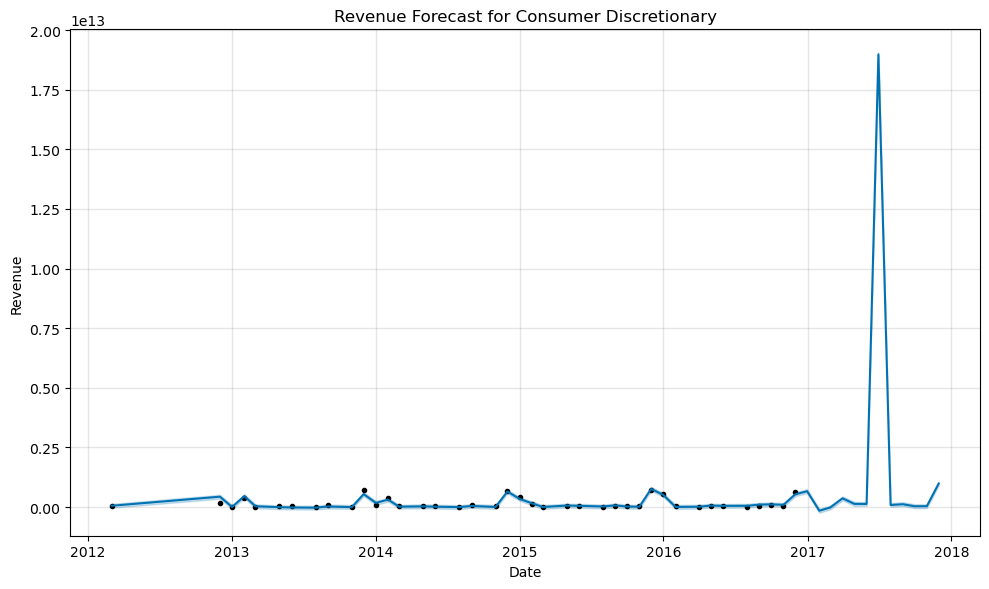

12:10:04 - cmdstanpy - INFO - Chain [1] start processing
12:10:04 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

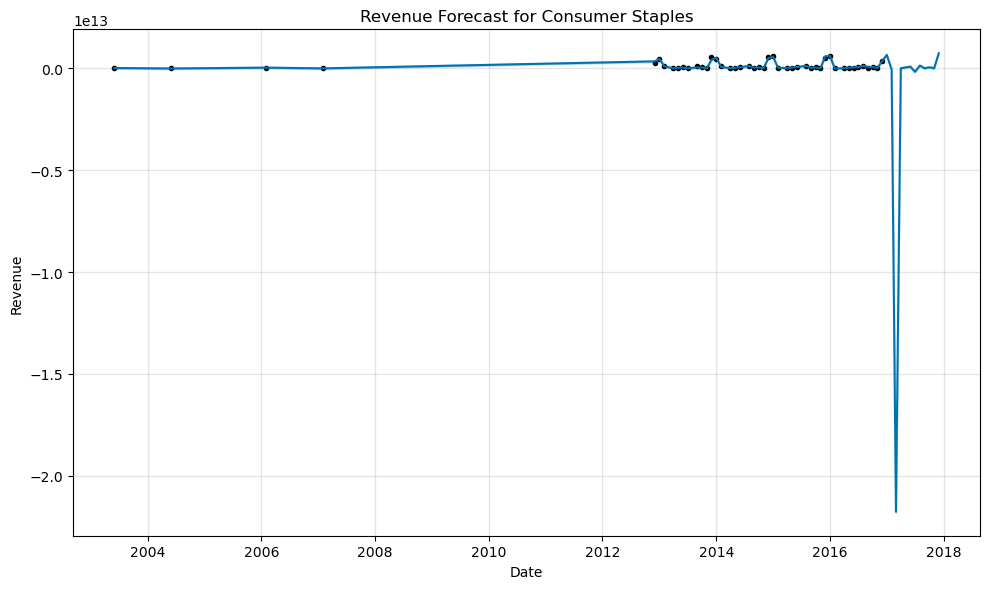

12:10:04 - cmdstanpy - INFO - Chain [1] start processing
12:10:04 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

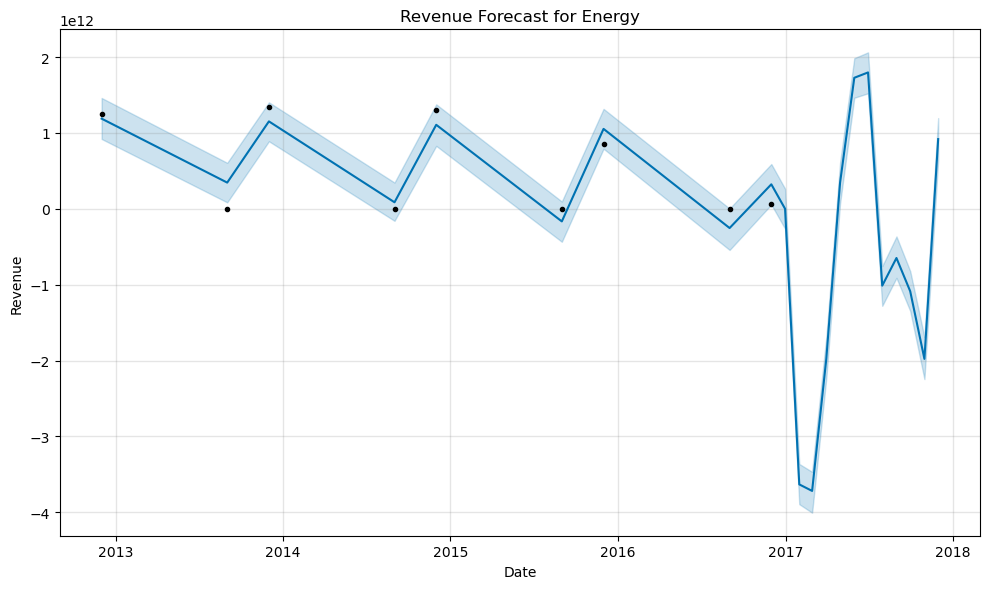

12:10:05 - cmdstanpy - INFO - Chain [1] start processing
12:10:05 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

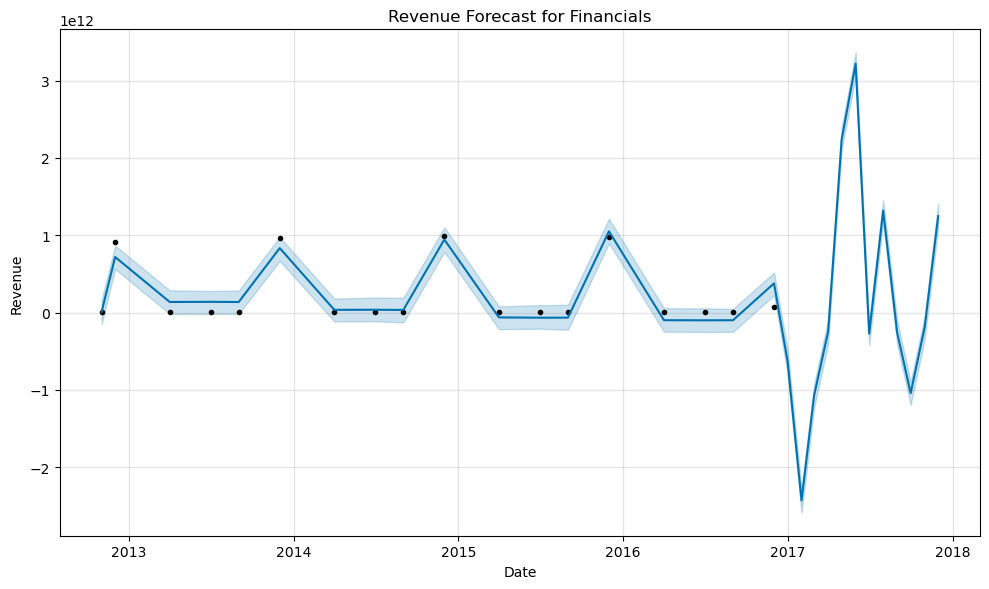

12:10:05 - cmdstanpy - INFO - Chain [1] start processing
12:10:05 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

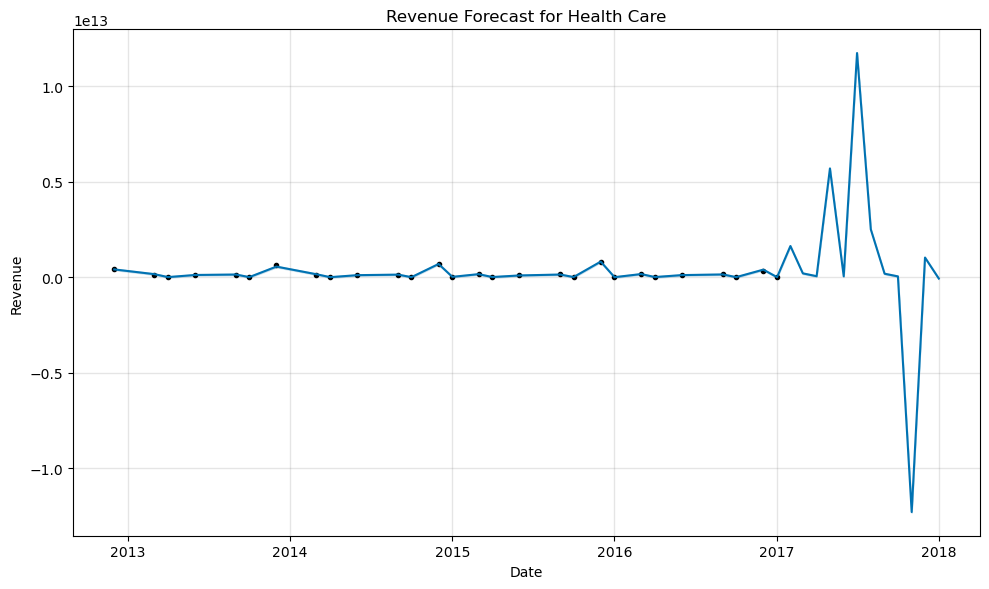

12:10:06 - cmdstanpy - INFO - Chain [1] start processing
12:10:06 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

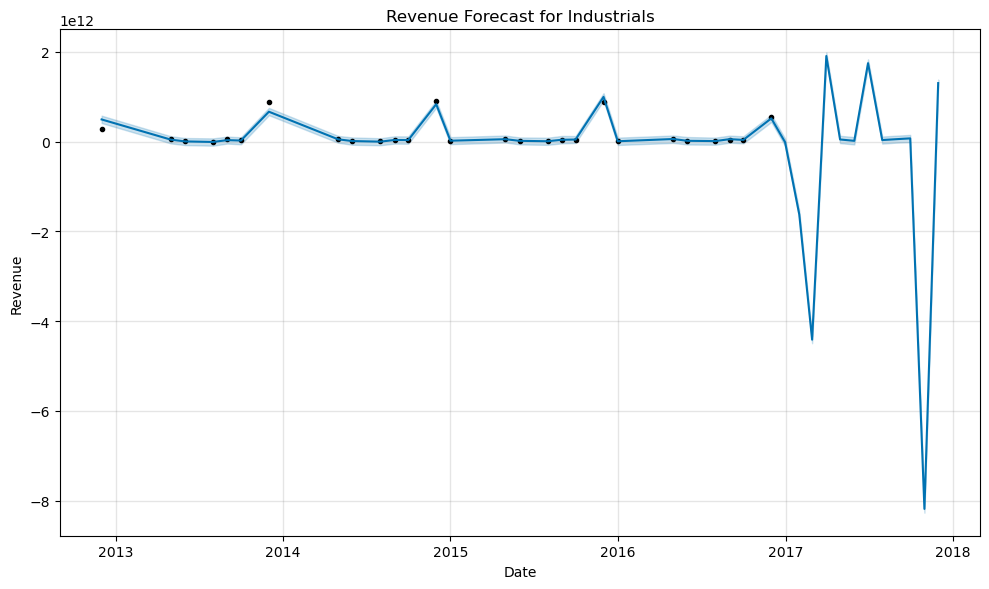

12:10:06 - cmdstanpy - INFO - Chain [1] start processing
12:10:06 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

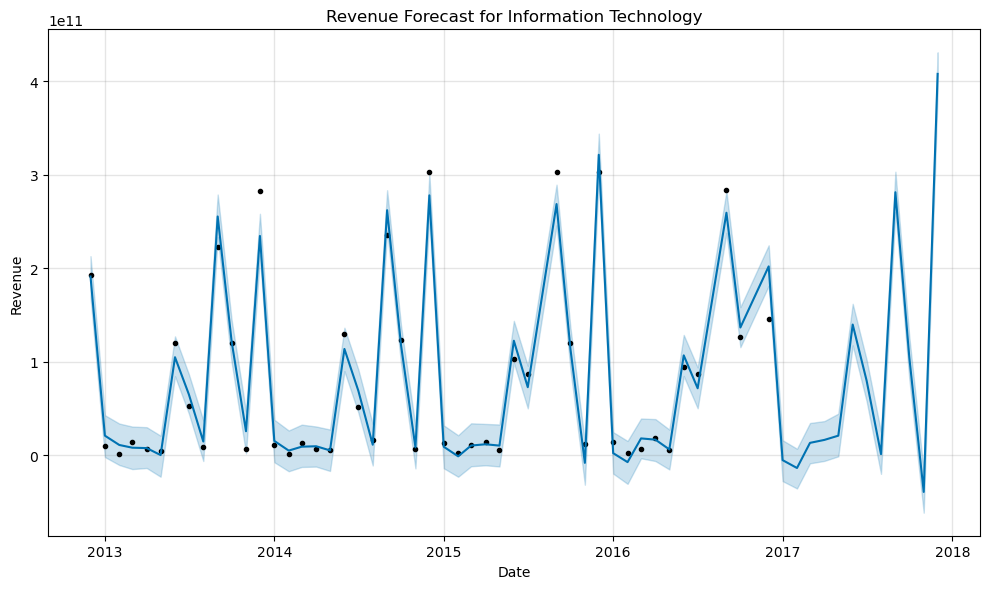

12:10:07 - cmdstanpy - INFO - Chain [1] start processing
12:10:07 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

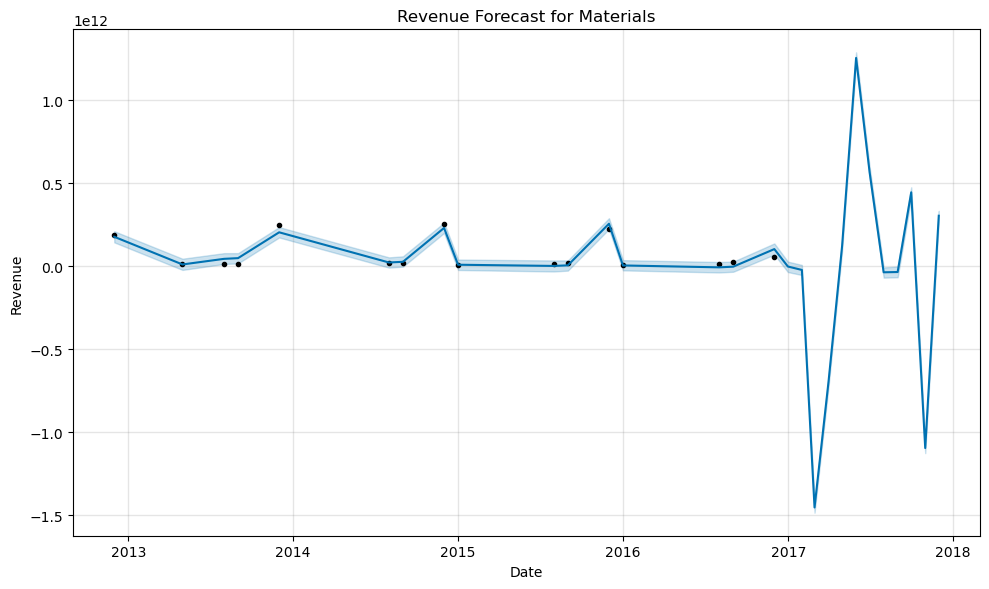

12:10:07 - cmdstanpy - INFO - Chain [1] start processing
12:10:07 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

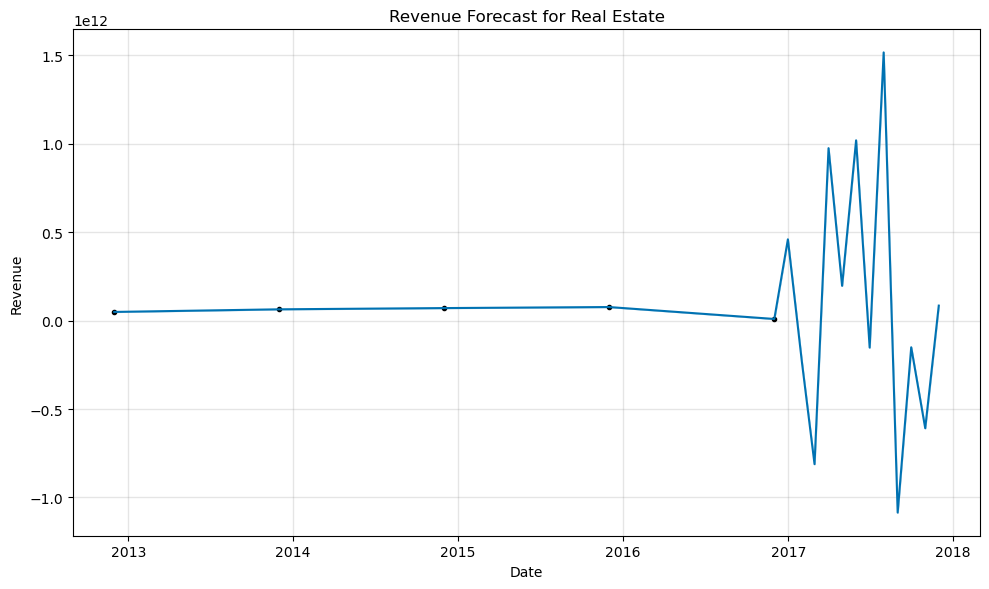

12:10:08 - cmdstanpy - INFO - Chain [1] start processing
12:10:12 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

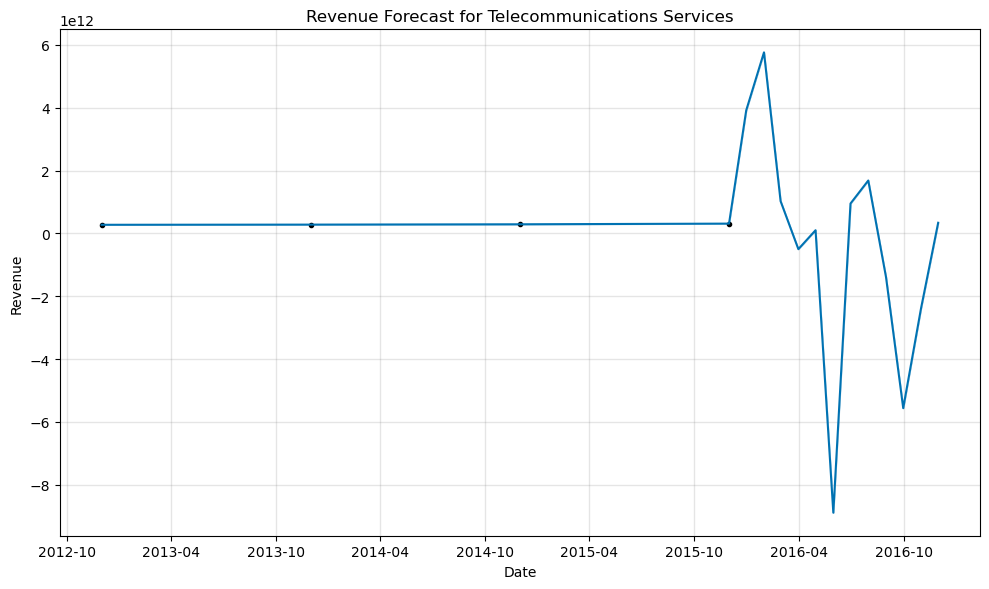

12:10:12 - cmdstanpy - INFO - Chain [1] start processing
12:10:12 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x400 with 0 Axes>

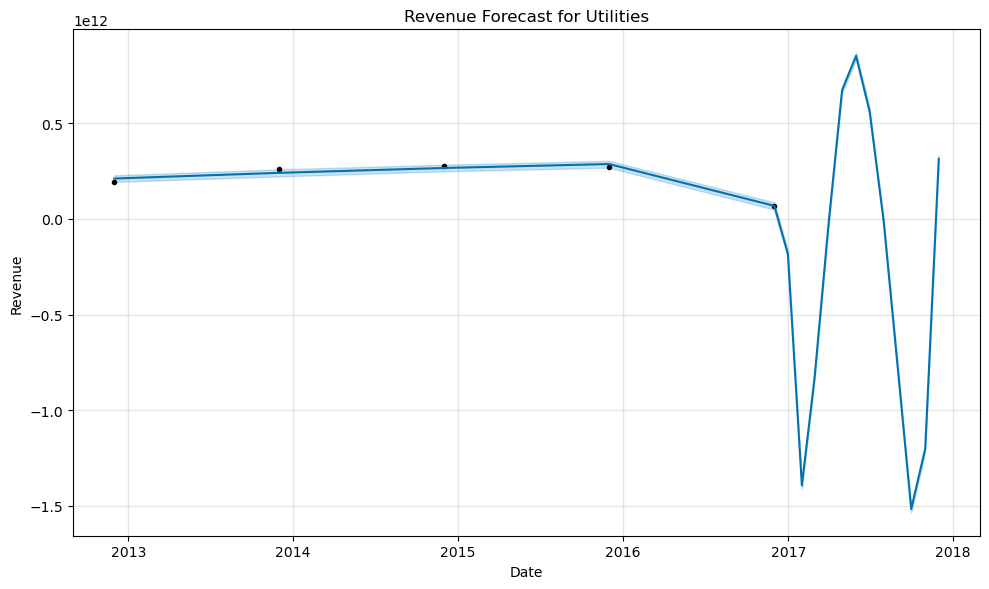

In [66]:
merged['year_month'] = merged['period_ending'].dt.to_period('M').astype(str)

# Step 4: Aggregate monthly revenue by GICS sector
sector_monthly = (
    merged.groupby(['gics_sector', 'year_month'])['total_revenue']
    .sum()
    .reset_index()
)

# Step 5: Forecast revenue for each sector
forecast_results = {}

for sector in sector_monthly['gics_sector'].dropna().unique():
    df = sector_monthly[sector_monthly['gics_sector'] == sector].copy()
    
    # Prepare data for Prophet
    df.rename(columns={'year_month': 'ds', 'total_revenue': 'y'}, inplace=True)
    df['ds'] = pd.to_datetime(df['ds'])

    model = Prophet()
    model.fit(df)

    # Forecast next 12 months
    future = model.make_future_dataframe(periods=12, freq='ME')
    forecast = model.predict(future)

    forecast_results[sector] = forecast[['ds', 'yhat']]

    # Plot
    plt.figure(figsize=(10, 4))
    model.plot(forecast)
    plt.title(f"Revenue Forecast for {sector}")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.tight_layout()
    plt.show()

## **5. Visualizations**
#### 5.1 Line plots, trend lines, rolling averages

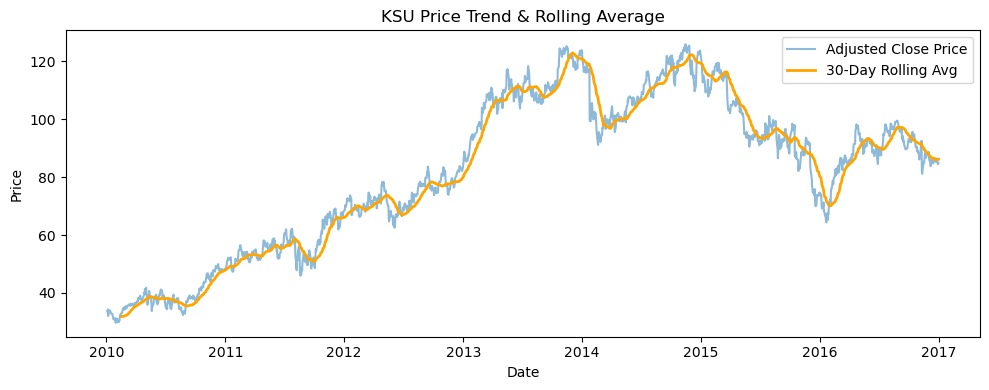

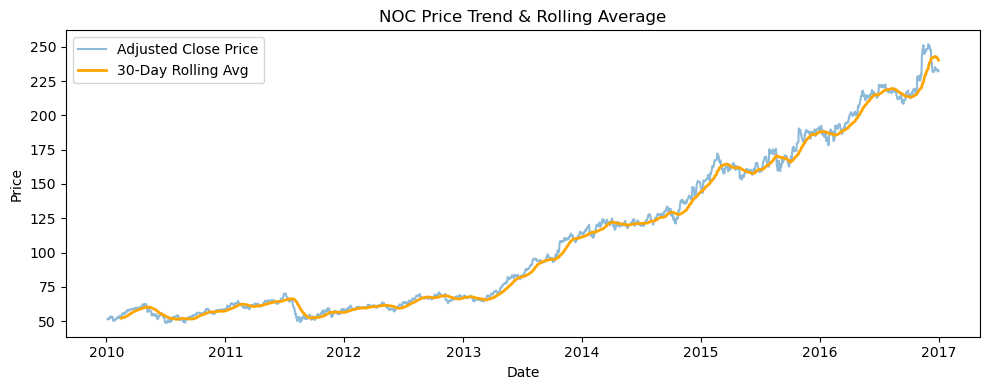

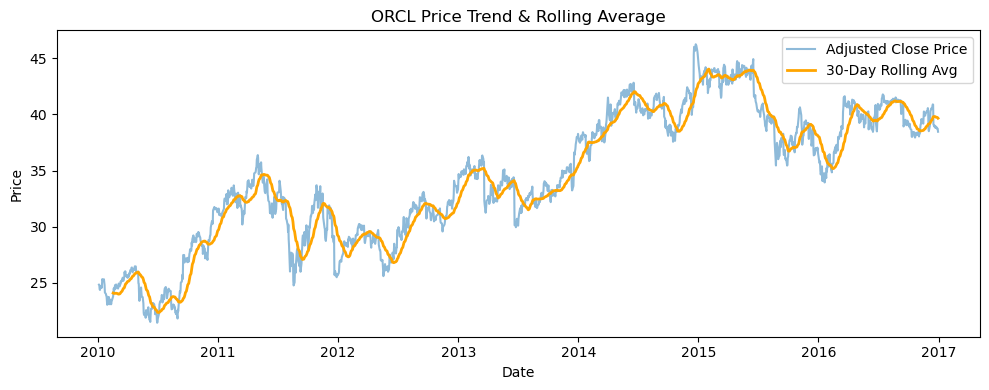

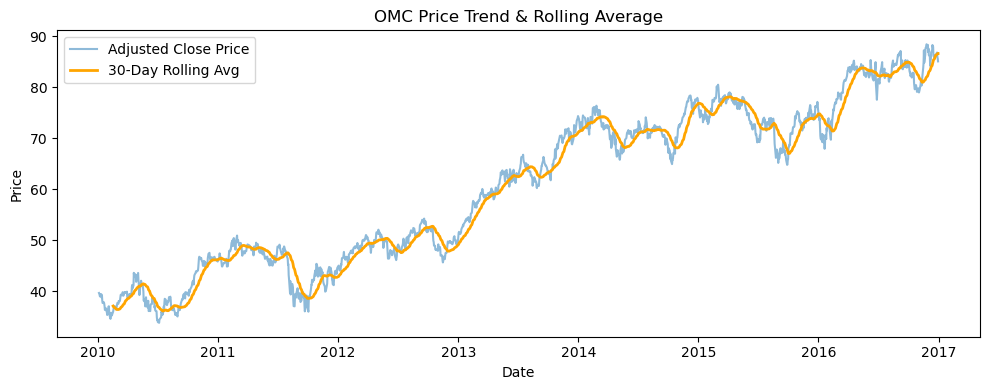

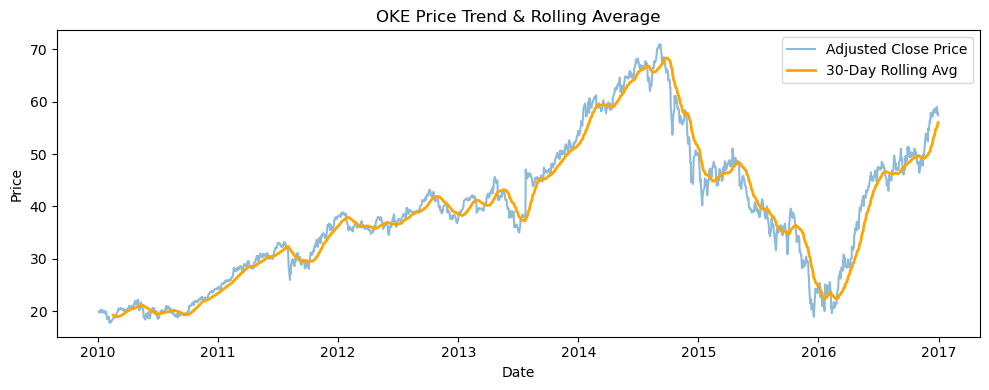

In [61]:
prices['date'] = pd.to_datetime(prices['date'])

# Select top 5 most frequent symbols for sample plot
top_symbols = prices['symbol'].value_counts().head(5).index.tolist()

for symbol in top_symbols:
    symbol_data = prices[prices['symbol'] == symbol].sort_values('date')
    symbol_data['rolling_mean'] = symbol_data['close'].rolling(window=30).mean()

    plt.figure(figsize=(10, 4))
    plt.plot(symbol_data['date'], symbol_data['close'], label='Adjusted Close Price', alpha=0.5)
    plt.plot(symbol_data['date'], symbol_data['rolling_mean'], label='30-Day Rolling Avg', linewidth=2, color='orange')
    plt.title(f"{symbol} Price Trend & Rolling Average")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.tight_layout()
    plt.show()


#### 5.2 Sector Heatmap of Predicted Growth

12:11:32 - cmdstanpy - INFO - Chain [1] start processing
12:11:32 - cmdstanpy - INFO - Chain [1] done processing
12:11:32 - cmdstanpy - INFO - Chain [1] start processing
12:11:32 - cmdstanpy - INFO - Chain [1] done processing
12:11:33 - cmdstanpy - INFO - Chain [1] start processing
12:11:33 - cmdstanpy - INFO - Chain [1] done processing
12:11:33 - cmdstanpy - INFO - Chain [1] start processing
12:11:33 - cmdstanpy - INFO - Chain [1] done processing
12:11:33 - cmdstanpy - INFO - Chain [1] start processing
12:11:33 - cmdstanpy - INFO - Chain [1] done processing
12:11:33 - cmdstanpy - INFO - Chain [1] start processing
12:11:33 - cmdstanpy - INFO - Chain [1] done processing
12:11:33 - cmdstanpy - INFO - Chain [1] start processing
12:11:34 - cmdstanpy - INFO - Chain [1] done processing
12:11:34 - cmdstanpy - INFO - Chain [1] start processing
12:11:34 - cmdstanpy - INFO - Chain [1] done processing
12:11:34 - cmdstanpy - INFO - Chain [1] start processing
12:11:34 - cmdstanpy - INFO - Chain [1]

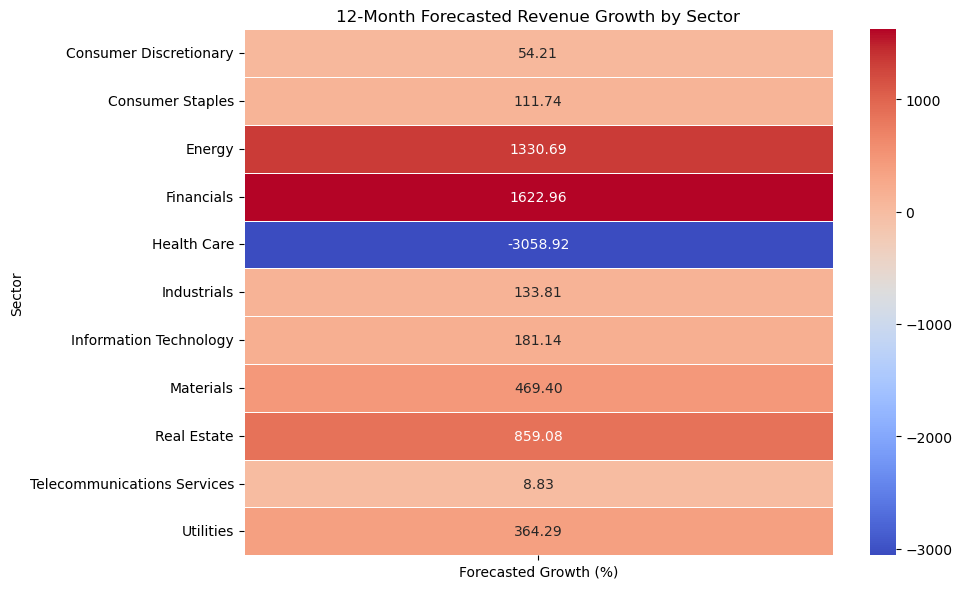

In [68]:
merged['period_ending'] = pd.to_datetime(merged['period_ending'])
merged['year_month'] = merged['period_ending'].dt.to_period('M').astype(str)

# Aggregate revenue per sector per month
sector_monthly = (
    merged.groupby(['gics_sector', 'year_month'])['total_revenue']
    .sum()
    .reset_index()
)

# Predict next 12 months of revenue per sector
growth_rates = {}

for sector in sector_monthly['gics_sector'].dropna().unique():
    df = sector_monthly[sector_monthly['gics_sector'] == sector].copy()
    df.rename(columns={'year_month': 'ds', 'total_revenue': 'y'}, inplace=True)
    df['ds'] = pd.to_datetime(df['ds'])

    m = Prophet()
    m.fit(df)
    future = m.make_future_dataframe(periods=12, freq='ME')
    forecast = m.predict(future)

    # Calculate growth rate: (last predicted - last actual) / last actual
    recent_actual = df[df['ds'] == df['ds'].max()]['y'].values[0]
    recent_forecast = forecast[forecast['ds'] == forecast['ds'].max()]['yhat'].values[0]
    growth = ((recent_forecast - recent_actual) / recent_actual) * 100
    growth_rates[sector] = round(growth, 2)

# Convert growth rates to DataFrame
growth_df = pd.DataFrame(list(growth_rates.items()), columns=['Sector', 'Forecasted Growth (%)'])
growth_df.set_index('Sector', inplace=True)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(growth_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("12-Month Forecasted Revenue Growth by Sector")
plt.tight_layout()
plt.show()
